In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf 
from tensorflow import keras
from keras import datasets, layers, models
import os

Importation des données

In [2]:
# import os
# directory = "C:/Users/utilisateur/Desktop/MNIST Dataset/MNIST - JPG - training/0"
# train_0 = []
# for filename in os.listdir(directory):
#     image = cv2.imread(directory + "/" + filename)
#     train_0.append(image)
    

In [3]:
# train_0 = np.array(train_0)

In [4]:
# train_0.shape

In [5]:
directory = 'C:/Users/Pauli/Desktop/MNIST Dataset/MNIST - JPG - training'

train = []
Label_train = []

for i in os.listdir(directory):
    Path = directory+"/"+i
    for j in os.listdir(Path):
        image = cv2.imread(Path+"/"+j)
        train.append(image)
        Label_train.append(int(i))

In [6]:
train = np.array(train)
Label_train = np.array(Label_train)

In [7]:
print("Pour train:\n",train.shape,"\n")
print("=========================================")
print("Pour label:\n",Label_train.shape,"\n")

Pour train:
 (60000, 28, 28, 3) 

Pour label:
 (60000,) 



In [8]:
directori = 'C:/Users/Pauli/Desktop/MNIST Dataset/MNIST - JPG - testing'

test = []
Label_test = []

for i in os.listdir(directori):
    Path = directori+"/"+i
    for j in os.listdir(Path):
        image = cv2.imread(Path+"/"+j)
        test.append(image)
        Label_test.append(int(i))

In [9]:
test = np.array(test)
Label_test = np.array(Label_test)

In [10]:
print("Pour test:\n",test.shape,"\n")
print("=========================================")
print("Pour label:\n",Label_test.shape,"\n")

Pour test:
 (10000, 28, 28, 3) 

Pour label:
 (10000,) 



In [11]:
train_images, test_images = train / 255.0, test / 255.0

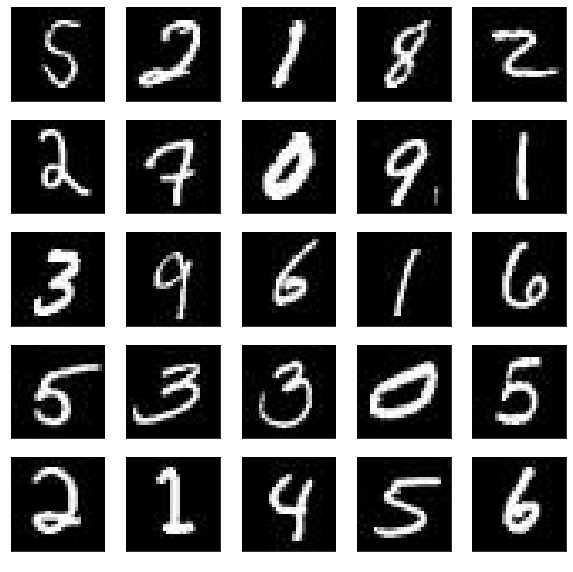

In [12]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    nbr = np.random.randint(0, 60000, [1])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[nbr[0]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[Label_train[nbr[0]]],color="white")
plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 56)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
Total params: 43,232
Trainable params: 43,232
Non-traina

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 56)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
 flatten (Flatten)           (None, 504)               0

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, Label_train, epochs=10, 
                    validation_data=(test_images, Label_test))

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1477 - accuracy: 0.9549 - val_loss: 0.0483 - val_accuracy: 0.9833
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0481 - accuracy: 0.9845 - val_loss: 0.0390 - val_accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0537 - val_accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0313 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0281 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 1019s 544ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0305 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 0.032

313/313 - 2s - loss: 0.0336 - accuracy: 0.9924 - 2s/epoch - 6ms/step


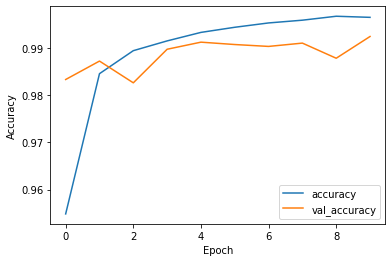

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.95, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  Label_test, verbose=2)

In [19]:
print(test_acc)

0.9923999905586243


<AxesSubplot:>

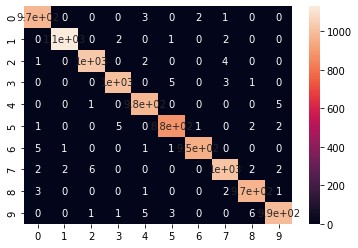

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(test)
pred = np.argmax(y_pred, axis=1)

    
cf_matrix = confusion_matrix(Label_test,pred)
sns.heatmap(cf_matrix, annot=True)


In [21]:
# import joblib
# joblib.dump(model, "modele_cnn")

model.save("cnn_essai")

INFO:tensorflow:Assets written to: cnn_essai\assets


In [22]:
def reco():
    dossier = 'C:/Users/Pauli/Desktop/MNIST Dataset/Essai'
    essai_images = []
    for fichier in os.listdir(dossier):
        num = cv2.imread(dossier + "/" + fichier)
        essai_images.append(num)

    essai_images = np.array(essai_images)

    cnn = tf.keras.models.load_model('cnn_essai')    

    pred = cnn.predict(essai_images)

    print("Pour l'image suivante :")
    plt.figure(figsize=(5,5))
    plt.imshow(essai_images[1])
    plt.show()

    print("Le numéro prédit est : ", np.argmax(pred[1]))

Pour l'image suivante :


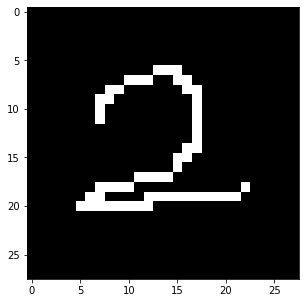

Le numéro prédit est :  2


In [23]:
reco()

In [24]:
def reco(dossier):   
    essai_images = []
    for fichier in os.listdir(dossier):
        num = cv2.imread(dossier + "/" + fichier)
        essai_images.append(num)

    essai_images = np.array(essai_images)

    cnn = tf.keras.models.load_model('cnn_essai')    

    pred = cnn.predict(essai_images)
    
    plt.figure(figsize=(10,10))
    for i in range(len(essai_images)):
        plt.subplot(5,5,i+1)
        plt.imshow(essai_images[i])
        plt.xlabel(np.argmax(pred[i]), color="white")
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

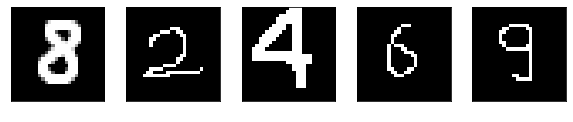

In [25]:
reco('C:/Users/Pauli/Desktop/MNIST Dataset/Essai')